# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# Check missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. There are no missing values in the data.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape  

(1898, 9)

#### Observations:
There are <b>1898 rows and 9 columns</b> present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. order_id, customer_id, food_preparation_time and delivery_time columns are of type <b>Integer</b>
2. cost_of_the_order column is of type <b>Float</b>. It can hold decimal values. 
3. restaurant_name, cuisine_type, day_of_the_week and rating columns are of type <b>Object</b>. Object type can hold a mix of numbers and string data

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# astype() function converts datatype of a column to the specified type passed in the argument

df["restaurant_name"] = df["restaurant_name"].astype("category")
df["cuisine_type"] = df["cuisine_type"].astype("category")
df["day_of_the_week"] = df["day_of_the_week"].astype("category")

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
The memory usage has reduced from 133.6+ KB to <b>102.7+ KB</b>

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Describe function provides statistical summary of numeric columns in the dataframe
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
It takes <b>minimum 20 mins</b> , an <b>average of 27.37 minutes</b> and <b>maximum 35 minutes</b> for food to be prepared once an order is placed. 

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Returns number of orders where rating column has value 'Not given'
df["rating"][df["rating"] == "Not given"].count()

736

#### Observations:
Total <b>736 orders are not rated</b>.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [3]:
# Function to plot distribution plot and box plot as subplots in one row.  
# This will be a resuable for univariate analysis of different variables of df dataframe

def distribution_box_plot(data, series, kde=False, mean=False, median=False, mode=False): 
    """
    Distplot and boxplot as subplots for a series within a dataframe
    data =  Dataframe
    series = column / variable under analysis
    kde =  Boolean. To show Kernel Density Estimate curve. Default set to False
    mean =  Boolean. To show mean value of a numeric series. Default set to False
    median = Boolean. To show median of a numeric series. Default set to False
    mode = Boolean. To show first mode value of a numeric series. Default set to False
    """
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1) # Divides the plot area into subplots with 1 row and 2 columns. 3rd arg indicates plot index
    sns.distplot(data[series], kde=kde) # Add distribution plot
    if mean ==  True:  # Add mean indicator to the distplot
        plt.axvline(data[series].mean(), color='r', linestyle='--', label = "Mean")
    if median == True: # Add median indicator to the distplot
        plt.axvline(data[series].median(), color='g', linestyle='-', label = "Median")
    if mode == True:  # Add first modal value indicator to the distplot
        plt.axvline(data[series].mode()[0], color='b', linestyle='-', label = "Mode")
    
    plt.legend()   # Show legends
    
    plt.subplot(1, 2, 2) 
    sns.boxplot(data = data, y = series, showmeans = True) #Add box plot with mean value indicator
    plt.show()  

In [4]:
# Function to plot labelled countplot with percentage and count over the bars  
# This will be a resuable for univariate analysis of different variables / columns within df dataframe

def labelled_countplot(data, series, showper=True, showcount=True, n=None):
    """
    data = Dataframe
    series = column / variable under analysis
    showper = Boolean. To show percentage over the bars.Default set to True
    showcount = Boolean. To show count over the bars.Default set to True
    n = number of top records to plot
    """
    count = data[series].nunique()  # get the number of unique values of the column
    if n is None:
        plt.figure(figsize=(count + 3.5, 7)) # Adjust the width of the graph area as per the unique values
    else:
        plt.figure(figsize=(n + 5, 5)) # Adjust the width of the graph area as per the n value specified
   
    # Show countplot of the data in descending order of value count 
    ax = sns.countplot(x=data[series],order=data[series].value_counts(ascending=False).index[:n])  
    
    # If True, show count as data label over each bar
    if showcount == True:
        for p, label in zip(ax.patches, data[series].value_counts(ascending=False).values):
            ax.annotate(label, (p.get_x()+0.100, p.get_height()+3.5))
    
    # If True, show percentage as data label over each bar
    if showper == True:
        total = data[series].count()
        for p, label in zip(ax.patches, 100 * data[series].value_counts(ascending=False).values / total):
            ax.annotate("({:.2f}%)".format(label), (p.get_x()+0.350, p.get_height()+3.5))
    
    plt.show()


#### Cost of the Order

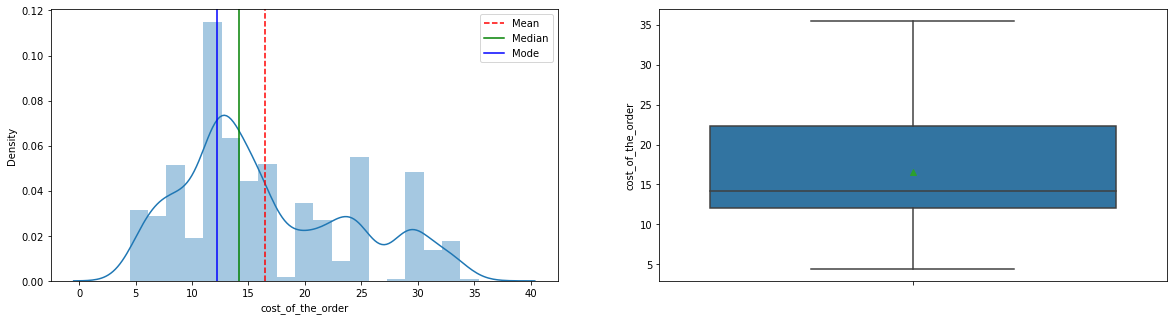

In [11]:
# Calling the distribution_box_plot function defined above for cost_of_the_order variable
distribution_box_plot(df,"cost_of_the_order",kde=True,mean=True, median=True, mode=True)

#### Observations
1. The cost of order ranges from 4 to 35 dollars.
2. Nearly 50% of the orders costs less than 15 dollars.
3. There is a positive skewness in the data. The mean is to the right of median and peak of the density curve. The average cost of order is around 16 dollars, however most of the orders costs around 12 dollars. 
4. There are no outliers in the data. 

#### Cuisine Type

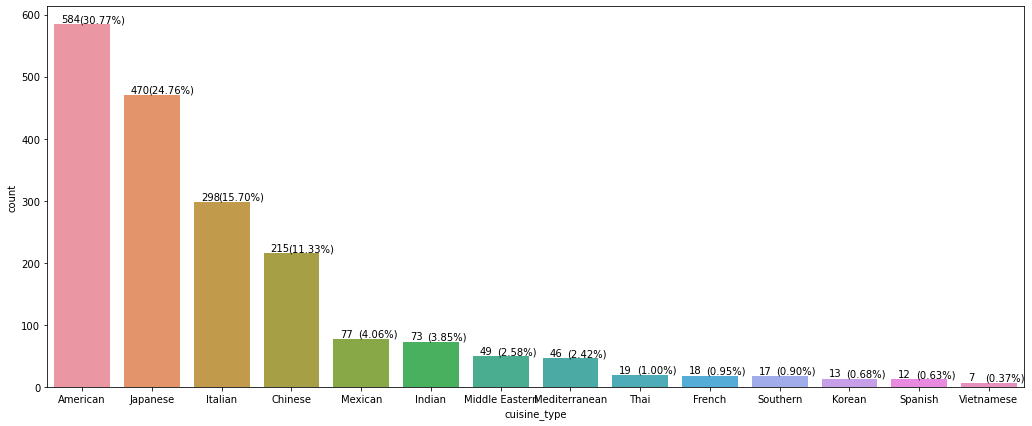

In [12]:
# Calling the labelled_countplot function defined above for cuisine_type variable
labelled_countplot(df ,"cuisine_type", showper = True, showcount = True)

#### Observations
1. American is the most popular cuisine as it constitutes 30.77% of all orders.
2. Japanese is the second most popular cuisine followed by Italian and Chinese. 
3. Within the available observations, Vietnamese is the least popular cuisine.

#### Day of the week

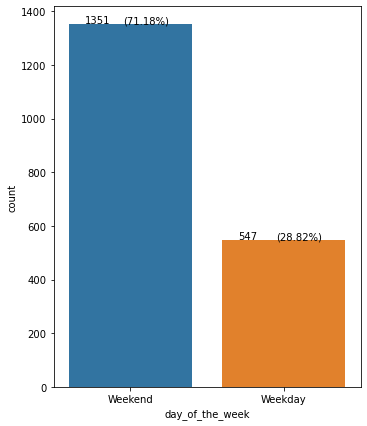

In [13]:
# Calling the labelled_countplot function defined above for day_of_the_week variable
labelled_countplot(df ,"day_of_the_week", showper = True, showcount = True)

#### Observations
1. There are significantly more number of orders on weekends than on weekdays. Nearly 71% of the orders are on weekends which indicates that people prefer to order food online on weekends than on weekdays.

#### Rating

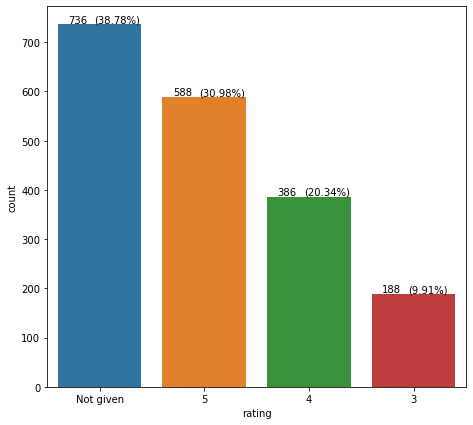

In [14]:
# Calling the labelled_countplot function defined above for rating variable
labelled_countplot(df ,"rating", showper = True, showcount = True)

#### Observations
1. 38% of all orders are not rated.

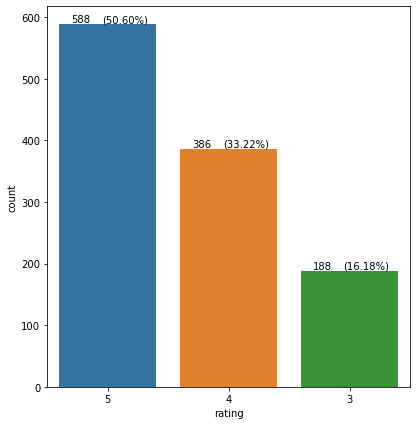

In [15]:
# Filter out orders where rating = "Not given" and analyse all rated orders
labelled_countplot(df[df["rating"]!="Not given"] ,"rating", showper = True, showcount = True)

#### Observations
1. 50% of all the rated orders are of rating 5. 
2. More than 80% of all rated orders are rated 4 or higher. 

#### Food preparation time

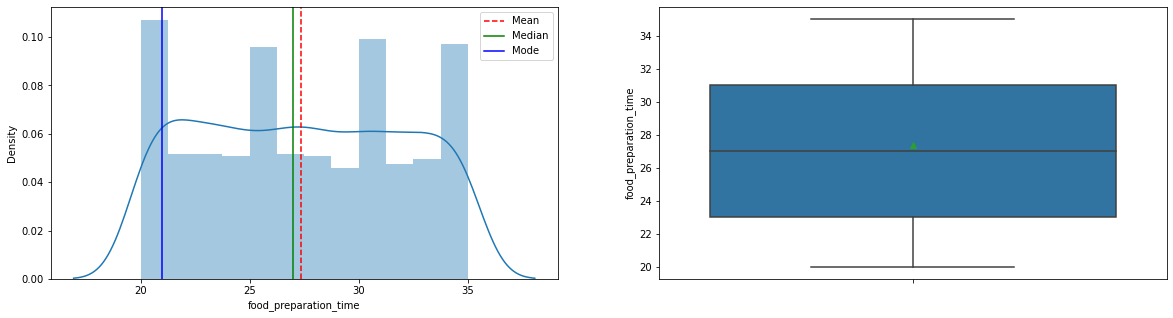

In [16]:
# Calling the distribution_box_plot function defined above for food_preparation_time variable
distribution_box_plot(df,"food_preparation_time",kde=True, mean=True, median=True, mode=True)

#### Observations
1. The data appears to have a fairely normal distribution. The mean and median are closest to each other (almost overlapping). 
2. The average food preparation time is upto 27 minutes. However, most of the orders take 21 minutes for food to be prepared. 
3. There are no outliers in the data.

#### Delivery Time

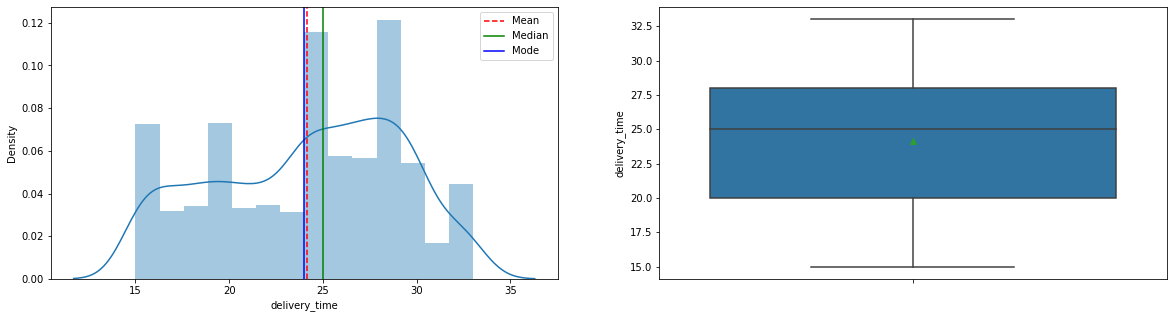

In [17]:
# Calling the distribution_box_plot function defined above for delivery_time variable
distribution_box_plot(df,"delivery_time",kde=True, mean=True, median=True, mode=True)

### Observations
1. The delivery time ranges from 15 to 32 minutes
2. The average delivery time is 24 minutes. This is also the delivery time most of the orders took, i.e mean and mode are almost coinciding.
3. There is a slight negative skewness in the data. Mean is to the left of the median value. 50% of the orders took upto 25 minutes to get delivered. 
4. There are no outliers in the data.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

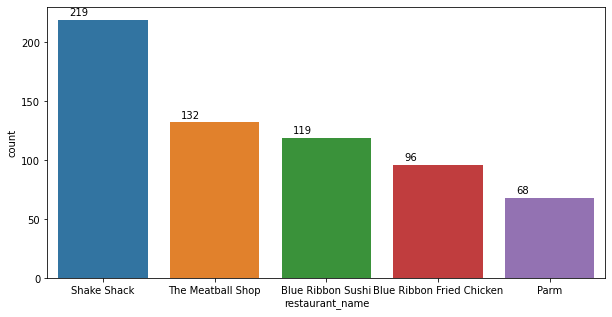

In [18]:
# Countplot to visualise number of orders by restaurant
labelled_countplot(df ,"restaurant_name", showper = False, showcount = True, n = 5)

#### Observations:
The top 5 restaurants in terms of number of orders received are:
<b> Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm </b>

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

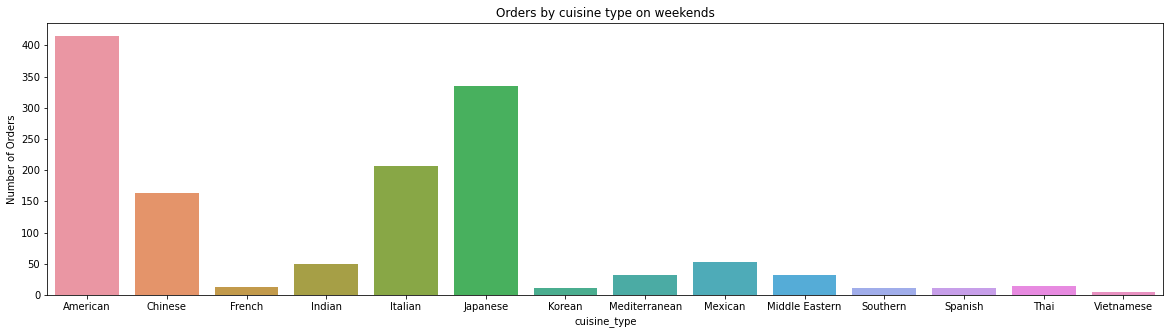

In [19]:
# count the number of orders by cuisine type
popular_cuisine = df[df["day_of_the_week"] == "Weekend"].groupby(["cuisine_type"])["order_id"].count().sort_values(ascending = False).reset_index()

# Plot the graph to see the cuisine with maximum number of orders.
plt.figure(figsize=(20,5))
sns.barplot(data = popular_cuisine, x = "cuisine_type", y = "order_id")
plt.title('Orders by cuisine type on weekends')
plt.ylabel('Number of Orders')
plt.show()


#### Observations:
The most popular cuisine on weekends is <b>American</b>

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

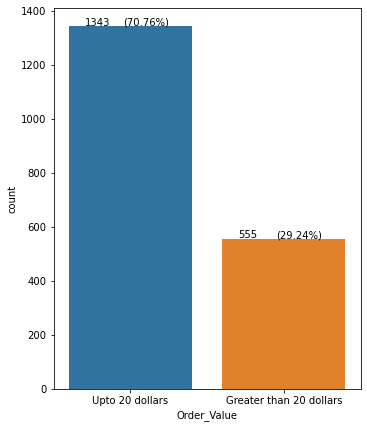

In [14]:
# Create a column Order_Value in df dataframe
df["Order_Value"] = ""

# For each row check the cost_of_the_order and capture if it is greater than or upto 20 dollars
for item in df.index:
    if df.loc[item, 'cost_of_the_order'] > 20:
        df.loc[item, 'Order_Value'] = "Greater than 20 dollars"
    else:
        df.loc[item, 'Order_Value'] = "Upto 20 dollars"
        
# Plot the graph to determine percentage of order value greater than 20 dollars        
labelled_countplot(df ,"Order_Value", showper = True, showcount = True)

#### Observations:
<b> 29.24% </b> of total orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Write the code here
df[["cost_of_the_order","food_preparation_time","delivery_time"]].describe().T 

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:
The mean order delivery time is <b>24.16 minutes</b>

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Calculate number of orders placed by each customer and store in a new dataframe in descending order of count
order = df[["customer_id","order_id"]].groupby(["customer_id"])["order_id"].count().sort_values(ascending = False).reset_index()

# Rename order count column 
order.rename(columns={"order_id":"Order Count"}, inplace = True)

# Print top 5 customers with most number of orders
print("Top 5 most frequent customers by number of orders placed are:")

order.head()


Top 5 most frequent customers by number of orders placed are:


,customer_id,Order Count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations:
Top 5 most frequent customers by number of orders placed are customer ID <b> 52832, 47440, 83287, 250494, 65009</b>

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [23]:
# Check the data type of each column
df.dtypes 

order_id                    int64
customer_id                 int64
restaurant_name          category
cuisine_type             category
cost_of_the_order         float64
day_of_the_week          category
rating                     object
food_preparation_time       int64
delivery_time               int64
Order_Value                object
dtype: object

#### Cost of Order by Day of the week for top 8 cuisines 

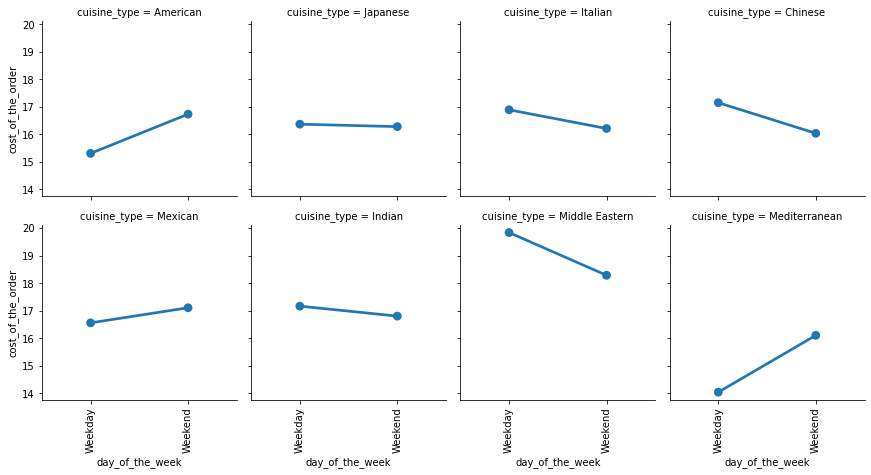

In [24]:
# Univariate analysis of cuisine_type has been referred to identify the top 8 cuisines by number of orders

# Build the cuisine list
cuisine_list = ["American","Japanese","Italian","Chinese","Mexican","Indian","Middle Eastern","Mediterranean"]

# seaborn catplot to analyse cost of order by day of the week for 8 most popular cuisines
cplot1=sns.catplot(x='day_of_the_week', y='cost_of_the_order', 
            data=df[df["cuisine_type"].isin(cuisine_list)],
                col='cuisine_type', kind="point",ci = None,
                height=3, col_wrap = 4,
                col_order = cuisine_list) 
cplot1.set_xticklabels(rotation=90) # set vertical orientation of x axes labels
plt.show()

#### Observations
1. Among the top 8 cuisines, the average cost of order of Middle Eastern and Chinese cuisine is higher on weekdays than on weekends.
2. The average cost of order of Mediterranean and American cuisine is higher on weekends than on weekdays.
3. The average cost of order does not vary much between weekdays and weekends for Japanese, Indian, Mexican and Italian.
4. The average cost of order of Mediterranean cuisine on weekdays drops below 15 dollars. 

#### Cost of Order analysis of less popular cuisines by Day of the week

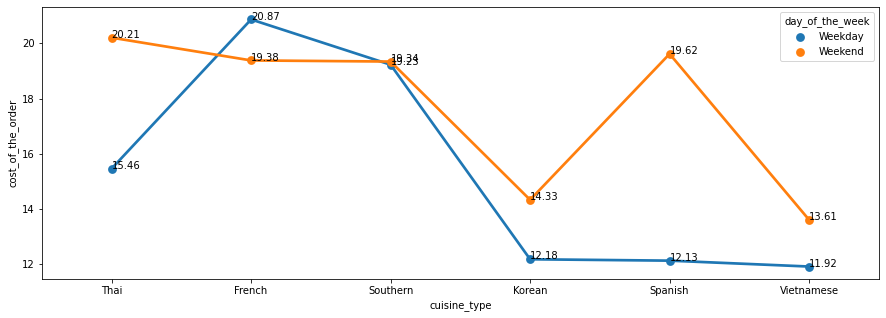

In [25]:
# Univariate analysis of cuisine_type has been referred to identify the less popular cuisines by number of orders

plt.figure(figsize=(15,5))

# seaborn pointplot to analyse cost of order of less popular cuisines by day of the week 
ax = sns.pointplot(data = df, x = "cuisine_type", 
                   y = "cost_of_the_order", hue = "day_of_the_week",
                   order=df["cuisine_type"].value_counts(ascending=False).index[8:],
                   ci=None)
for c in ax.collections:         
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)

plt.show()


#### Observations
1. The average cost of the order of Thai food is more than 20 dollars on weekends. So is the case with French on Weekdays.
2. Cost of order for Spanish varies significantly between weekdays and weekends. Although, the number of observations are not enough to make any deductions. 
3. Southern cuisine has nearly the same average cost across days of week, where Korean and Vietnamese only varies by approximately 2 dollars. Although, the number of observations are not enough to make any deductions. 

#### cuisine_type Vs food_preparation_time

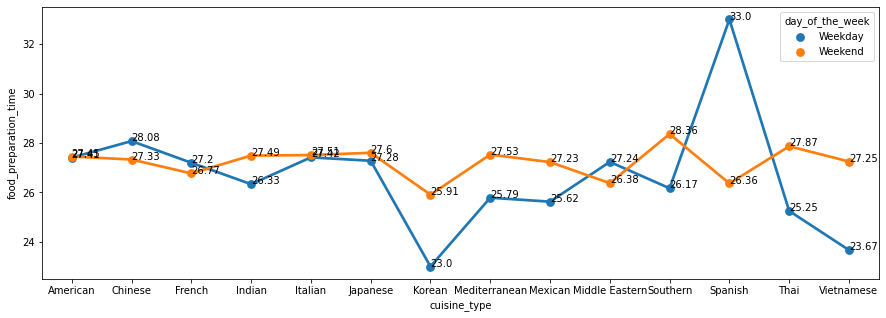

In [26]:
plt.figure(figsize=(15,5))

ax = sns.pointplot(x = "cuisine_type", y = "food_preparation_time", data = df, hue = "day_of_the_week",ci=None)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)
plt.show()


#### Observations
1. There is a visible variation in average food preparation time of Spanish, Vietnamese and Korean cuisines between weekends and weekdays. The time does not vary much for rest of the cuisines (0 to 2 mins).  
 

#### day_of_the_week Vs delivery_time

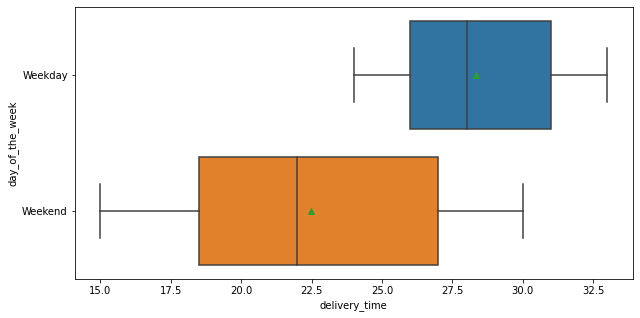

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(y = "day_of_the_week", x = "delivery_time", data = df, showmeans = True)
plt.show()

#### Observations
1. The minimum delivery time on weekend is 15 minutes whereas it takes minimum of 24 minutes on weekdays. Food preparation time is consistent across days of the week. There isn't enough information on what is causing the increased delivery time on weekdays when there are less number of orders on weekdays. 
2. The maximum delivery time increases by 2 minutes on weekdays.  
3. Half of the orders takes upto 22 minutes to deliver on weekend, and 28 minutes on weekday. These are also nearly the average delivery time on respective days of the week. The delivery time varies significantly between weekdays and weekends
4. Most of the orders take 28 minutes to deliver on weekends and almost 24 minutes on weekdays. 

#### day_of_the_week Vs food_preparation_time

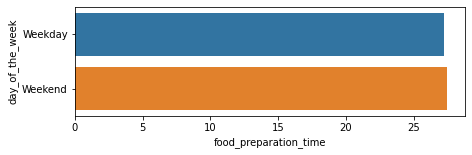

In [28]:
plt.figure(figsize=(7,2))
sns.barplot(y = "day_of_the_week", x = "food_preparation_time", data = df, ci=None)
plt.show()

#### Observations
1. Food preparation time does not vary by day of the week.  
 

#### Rating Vs food preparation time

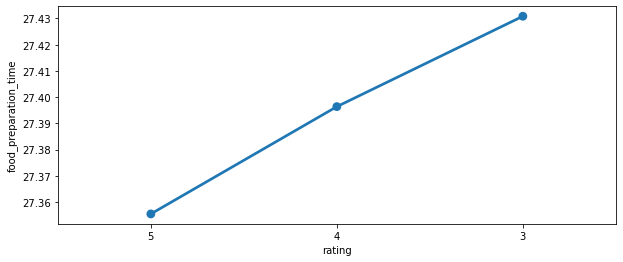

In [29]:
plt.figure(figsize=(10,4))

# Filter out "Not given" ratings and analyse rating against food preparation time

sns.pointplot(data=df[df["rating"]!="Not given"], x="rating", y="food_preparation_time", order=['5','4','3'], ci=None)
plt.show()


#### Observations
2. Rating appears to have a linear relationship with food preparation time.
3. On an average, highest rating has been given to orders that takes less food preparation time, which directly contribute towards the total delivery time to customer. Although the food preparation time only varies by a few seconds for rated orders.
4. 3 rating (lowest among available ratings) has been given to orders that takes maximum food preparation time. 
 

#### Rating Vs Delivery time

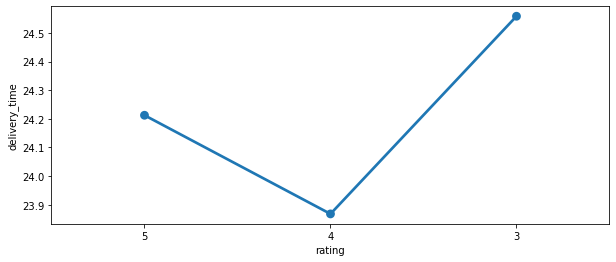

In [30]:
plt.figure(figsize=(10,4))

# Filter out "Not given" ratings and analyse rating against delivery time
sns.pointplot(data=df[df["rating"]!="Not given"], x="rating", y="delivery_time",
              order=['5','4','3'], ci=None) 
plt.show()

#### Observations
1. 3 rating (lowest among available ratings) has been given to orders that takes maximum delivery time. 
2. Orders that takes least delivery time are rated 4.  

 

#### Impact analysis of rating on delivery time and food preparation time for top 8 cuisines by number of orders

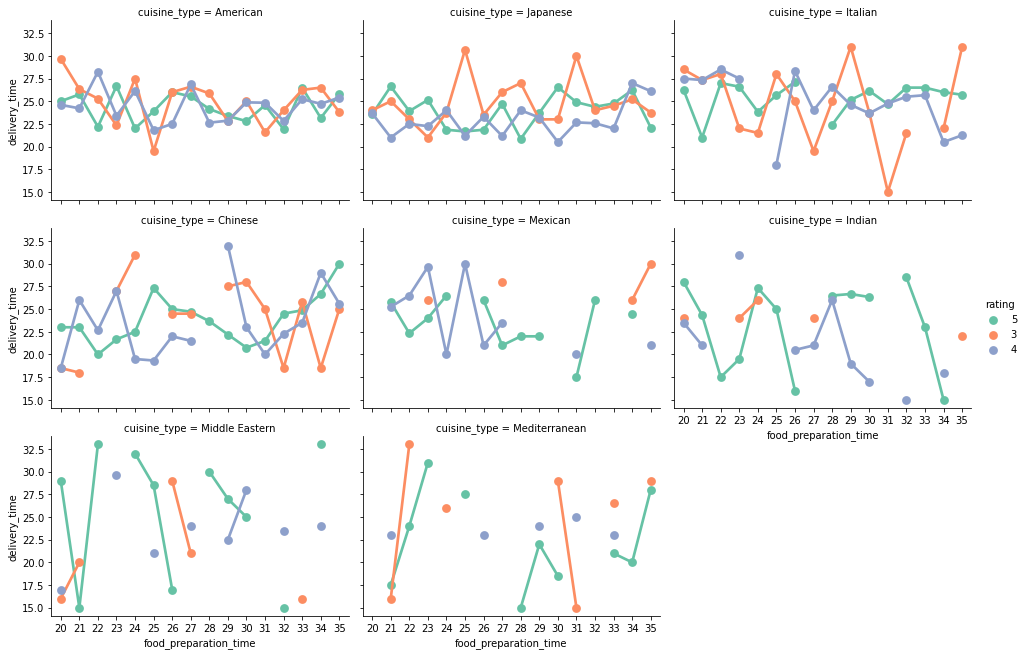

In [31]:
# Univariate analysis of cuisine_type has been referred to identify the top 8 cuisines by number of orders

ax=sns.catplot(x='food_preparation_time', y="delivery_time", hue="rating",
            data=df[(df["cuisine_type"].isin(cuisine_list)) & (df["rating"]!="Not given")],
                col='cuisine_type', kind="point", ci = None,
                height=3, col_wrap = 3, palette="Set2", aspect = 1.5, 
                col_order = cuisine_list) 
cplot1.set_xticklabels(rotation=90)
plt.show()

#### Observations
1. American cuisine has lowest rating for higest delivery time and lowest food preparation time. This indicates that delivery time could be impacting customer experience, therefore feedback. 
2. Both food preparation and delivery time appears to be impacting lowest rating for Mexican and Mediterranean cuisine.
3. Neither food preparation nor delivery time appears to be impacting feedback for Indian cuisine. 
4. Food quality appears to be driving highest rating for Chinese, American and Japanese cuisines. The performance is nearly consistent across delivery and food preparation time, with American being the most consistent performer. 

#### Rating Vs Cost of the order for top 8 cuisines by number of orders

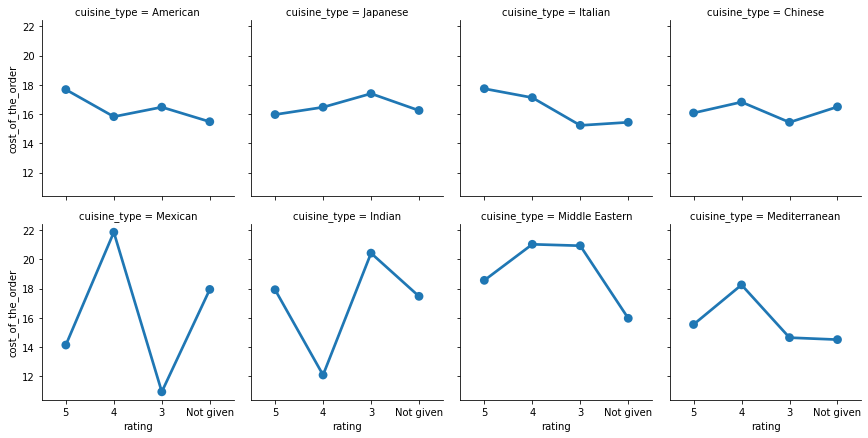

In [32]:
# Univariate analysis of cuisine_type has been referred to identify the top 8 cuisines by number of orders

ax=sns.catplot(x='rating', y='cost_of_the_order', 
            data=df[df["cuisine_type"].isin(cuisine_list)],
                col='cuisine_type', kind="point", ci = None,
                height=3, col_wrap = 4,
                order = ["5","4","3","Not given"],  
                col_order = cuisine_list) #estimator=sum, 
cplot1.set_xticklabels(rotation=90)
plt.show()

#### Observations
1. Among the top 8 cuisines, American and Italian have highest rating for highest cost of order. This indicates that customers are getting value for their money. 
2. Japanese and Indian have 3rd rating for their highest cost of orders. This indicates that there is need for improvement in food quality and/or service for customers to get value for their money. 
3. Mexican cuisine has lowest rating for lowest cost of order. There is a need to improve the food quality for low cost items.
4. There is no consistency in feedback for Middle Eastern higher value items. There is a overall need to review the food quality and service. 
5. Chinese and American cuisine are relatively consistent performers. 

#### Top 10 revenue generating restaurants

In [5]:
res_by_rev = df.groupby(["restaurant_name"])["cost_of_the_order"].sum().sort_values(ascending = False).head(10).reset_index()
res_by_rev.rename(columns={"cost_of_the_order":"revenue"}, inplace = True)
print("Top 10 revenue generating restaurants are: ")
res_by_rev


Top 10 revenue generating restaurants are: 


,restaurant_name,revenue
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


#### Number of frequent/returning customers in top 10 revenue generating restaurants and their average cost of order

Average cost of order of returning customers within the top 10 revenue generating restaurants


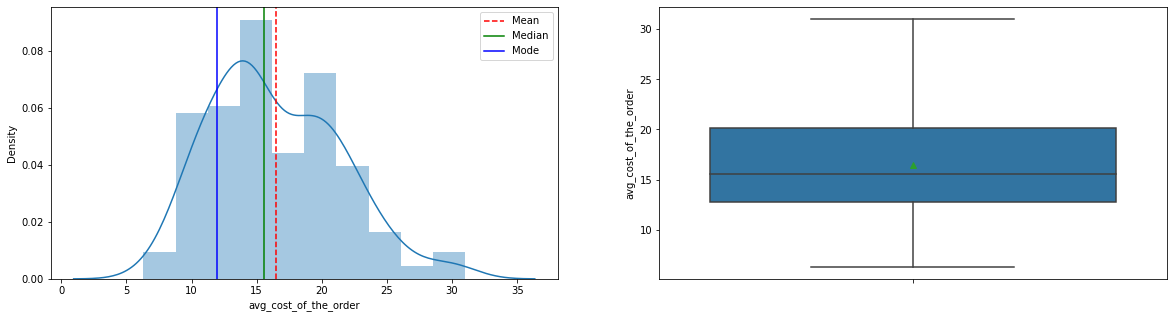

In [6]:
# Calculate the number of orders per customer within the top 10 revenue generating restaurants
returning_customers =  df[df["restaurant_name"].isin(res_by_rev.restaurant_name.unique())].groupby(["restaurant_name","customer_id"])["order_id"].count().sort_values(ascending = False).reset_index()
returning_customers.rename(columns={"order_id":"no_of_orders"}, inplace = True)

# Calculate the average cost of order per customer within the top 10 revenue generating restaurants
ret_cust_rev = df[df["restaurant_name"].isin(res_by_rev.restaurant_name.unique())].groupby(["restaurant_name","customer_id"])["cost_of_the_order"].mean().sort_values(ascending = False).reset_index()
ret_cust_rev.rename(columns={"cost_of_the_order":"avg_cost_of_the_order"}, inplace = True)

# merge two dataframes to add average cost of order to the returning customer dataframe
ret_cust_res = returning_customers.merge(ret_cust_rev, on=["restaurant_name","customer_id"], how="outer")

# Visualize average cost of order of returning customers within the top 10 revenue generating restaurants

print("Average cost of order of returning customers within the top 10 revenue generating restaurants")

distribution_box_plot(ret_cust_res[ret_cust_res["no_of_orders"] > 1]
                      ,"avg_cost_of_the_order",kde=True,mean=True, median=True, mode=True)


#### Observations
Average cost of order of most of the returning/frequent customers is approximately 15 dollars.

#### Returning customers in top 10 revenue generating restaurants with average cost of order greater than 20 dollars

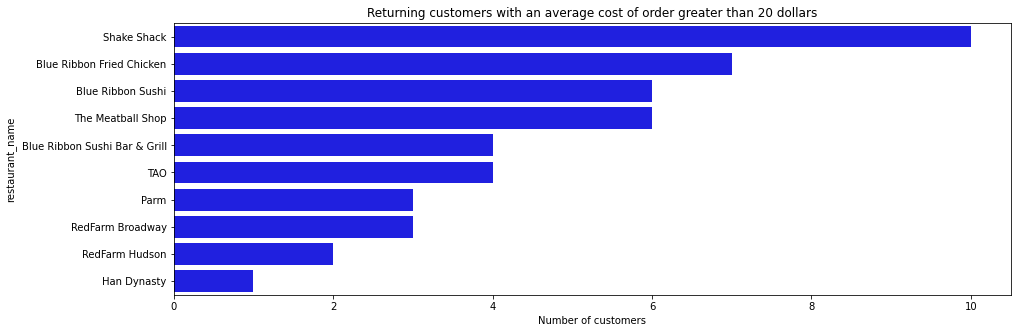

In [7]:
#Visualise the data to see returning customers with an average cost of order greater than 20 dollars.

plt.figure(figsize=(15,5))
sns.countplot(y = "restaurant_name", 
            data = ret_cust_res[(ret_cust_res["no_of_orders"]>1) & (ret_cust_res["avg_cost_of_the_order"]>20)], 
            order=returning_customers["restaurant_name"][(ret_cust_res["no_of_orders"]>1) & (ret_cust_res["avg_cost_of_the_order"]>20)].value_counts(ascending=False).index[:],
            color="b");
plt.title("Returning customers with an average cost of order greater than 20 dollars")
plt.xlabel("Number of customers")
plt.show()


#### Observations
Shake Shack has the highest number of returning/frequent customers with average cost of order greater than 20 dollars.

#### Correlation among numeric variables

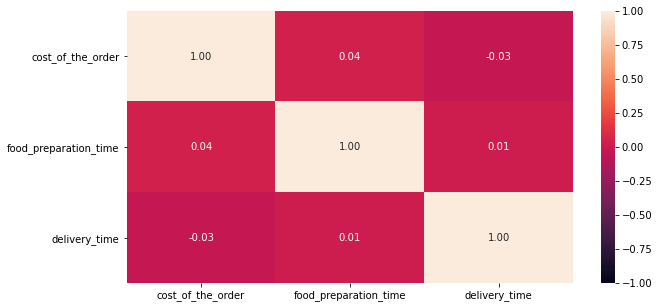

In [8]:
col_list =["cost_of_the_order", "food_preparation_time", "delivery_time"]
plt.figure(figsize=(10, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations
1. There is no high positive or negative correlation among any of the variables.


#### Correlation of rating with other numeric variables

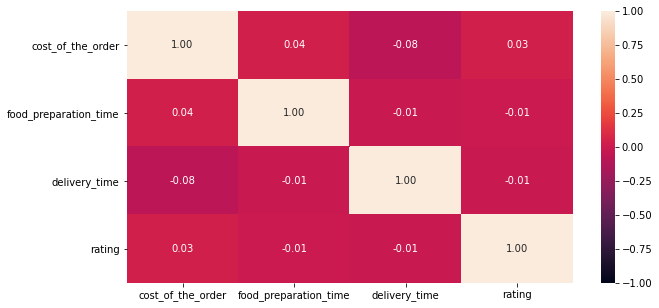

In [9]:
# Create a new dataframe with cost_of_the_order, food_preparation_time, delivery_time and rating where rating is available

# Filter out records where rating is "Not given"
dd = df[["cost_of_the_order", "food_preparation_time", "delivery_time","rating"]][df["rating"]!="Not given"]

# Convert rating to integer
dd["rating"] = dd["rating"].astype(str).astype(int)

plt.figure(figsize=(10, 5))
sns.heatmap(dd.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()


#### Observations
1. There is very low negative correlation of rating with delivery time and food preparation time.
2. Rating has a low positive correlation with cost of order.

#### Top 10 restaurants by number of orders and day of the week with their average rating, cost of order, unique customers count and cuisine type

In [10]:
# Orders per restaurant by day of the week
Orders_by_Res = df[["restaurant_name","day_of_the_week","order_id"]].groupby(["restaurant_name","day_of_the_week"])["order_id"].count().sort_values(ascending = False).reset_index()
Orders_by_Res.rename(columns={"order_id":"Order_Count"}, inplace = True)

# Rating per restaurant by day of the week
Res_rating_day = df[["restaurant_name","day_of_the_week","rating"]][df["rating"]!="Not given"]
Res_rating_day["rating"] = Res_rating_day["rating"].astype(str).astype(int)
Res_rating_avg = Res_rating_day.groupby(["restaurant_name","day_of_the_week"])["rating"].mean().reset_index()
Res_rating_avg.rename(columns={"rating":"Average_Rating"}, inplace = True)

df1 = Orders_by_Res.merge(Res_rating_avg, on=["restaurant_name","day_of_the_week"], how="outer")

# Average Cost of order per restaurant by day of the week
coo_by_Res = df[["restaurant_name","day_of_the_week","cost_of_the_order"]].groupby(["restaurant_name","day_of_the_week"])["cost_of_the_order"].mean().sort_values(ascending = False).reset_index()
coo_by_Res.rename(columns={"cost_of_the_order":"Average_cost_of_order"}, inplace = True)

df2 = df1.merge(coo_by_Res, on=["restaurant_name","day_of_the_week"], how="outer")

# Number of unique customers per restaurant by day of the week
cust_by_Res = df[["restaurant_name","day_of_the_week","customer_id"]].groupby(["restaurant_name","day_of_the_week"])["customer_id"].nunique().sort_values(ascending = False).reset_index()
cust_by_Res.rename(columns={"customer_id":"Cust_Count"}, inplace = True)

df3 = df2.merge(cust_by_Res, on=["restaurant_name","day_of_the_week"], how="outer")

# cusines served by the restaurant
res_by_cuis =df[["restaurant_name","day_of_the_week","cuisine_type"]].groupby(["restaurant_name","day_of_the_week"])["cuisine_type"].unique().reset_index()

# Final dataframe 
final_df = df3.merge(res_by_cuis, on=["restaurant_name","day_of_the_week"], how="outer")
final_df.head(10)


,restaurant_name,day_of_the_week,Order_Count,Average_Rating,Average_cost_of_order,Cust_Count,cuisine_type
0,Shake Shack,Weekend,145,4.302326,16.146552,124,[American]
1,The Meatball Shop,Weekend,95,4.425926,16.418211,79,"[Italian, American]"
2,Blue Ribbon Sushi,Weekend,85,4.241379,15.606824,58,[Japanese]
3,Shake Shack,Weekday,74,4.234043,16.733514,69,[American]
4,Blue Ribbon Fried Chicken,Weekend,74,4.285714,17.717973,55,[American]
5,RedFarm Broadway,Weekend,44,4.303030,16.386364,33,[Chinese]
6,RedFarm Hudson,Weekend,44,4.035714,17.057045,37,[Chinese]
7,Parm,Weekend,42,3.923077,15.466190,38,[Italian]
8,The Meatball Shop,Weekday,37,4.666667,15.823784,34,"[Italian, American]"
9,TAO,Weekend,37,4.434783,17.484865,29,[Japanese]


#### Top 10 restaurants with average rating higher than 4.5 on weekdays

In [11]:
final_df[(final_df["day_of_the_week"]=="Weekday")&(final_df["Average_Rating"]>4.5)].head(10).sort_values(by ="Order_Count", ascending = False)



,restaurant_name,day_of_the_week,Order_Count,Average_Rating,Average_cost_of_order,Cust_Count,cuisine_type
8,The Meatball Shop,Weekday,37,4.666667,15.823784,34,"[Italian, American]"
15,Parm,Weekday,26,4.538462,17.814615,26,[Italian]
26,Blue Ribbon Sushi Bar & Grill,Weekday,15,4.875000,14.438000,12,[Japanese]
38,RedFarm Hudson,Weekday,11,4.833333,15.518182,11,[Chinese]
58,Blue Ribbon Sushi Izakaya,Weekday,8,4.714286,15.608750,8,[Japanese]
69,P.J. Clarke's,Weekday,6,4.666667,15.733333,6,[American]
70,The Smile,Weekday,6,4.750000,14.438333,6,[American]
74,Saravanaa Bhavan,Weekday,5,5.000000,14.038000,5,[Indian]
87,S'MAC,Weekday,4,4.666667,12.527500,4,[American]
88,The Kati Roll Company,Weekday,4,5.000000,17.437500,4,[Indian]


#### Observations
1. American is the most popular cuisine on weekdays followed by Japanese and Indian. 

### Number of restaurants with no orders on weekday and weekend

In [64]:
final_df[["day_of_the_week","Order_Count"]][(final_df["Order_Count"]==0)].day_of_the_week.value_counts()

Weekday    57
Weekend    19
Name: day_of_the_week, dtype: int64

### Observations
There are 57 restaurants with no orders on weekdays. There isn't enough information to know if these restaurants are open on weekdays, but if they are, they could run discount promotions on weekdays to attract customers. The 19 restaurants with no orders on weekends could use similar strategy.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [12]:
# Filter out records where restaurant rating is "Not Given". This will exclude such records from analysis
Restaurant_rating = df[["restaurant_name","rating"]][df["rating"]!="Not given"]

# Count number of ratings of each restuarant
Restaurant_rating_cnt = Restaurant_rating.groupby(["restaurant_name"])["rating"].count().reset_index()

# Rename count column
Restaurant_rating_cnt.rename(columns={"rating":"Number_of_Ratings_available"}, inplace = True)

# Series rating is of type Object. Convert it to integer to calculate average rating 
Restaurant_rating["rating"] = Restaurant_rating["rating"].astype(str).astype(int)

# Find average rating of each restaurant
Restaurant_avg_rating = Restaurant_rating.groupby(["restaurant_name"])["rating"].mean().reset_index()

# Rename average column
Restaurant_avg_rating.rename(columns={"rating":"Average_Rating"}, inplace = True)

# Add average column to count table
res = Restaurant_rating_cnt.merge(Restaurant_avg_rating, on="restaurant_name", how="inner")

# Filter restuarants where rating count of more than 50 and the average rating is greater than 4
res[(res["Number_of_Ratings_available"] > 50) & (res["Average_Rating"] > 4)] 

,restaurant_name,Number_of_Ratings_available,Average_Rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are <b> Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop </b>

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [15]:
#Initialise variable to store company revenue
foodhub_revenue = 0

# Order_Value column was added to the dataframe as part of question 9 solution. 
# Order_Value holds value "Greater than 20 dollars" where cost_of_the_order > 20 and Upto 20 dollars for cost_of_the_order <=20

# Calculate company revenue for orders having cost greater than 20 dollars
foodhub_revenue = df["cost_of_the_order"][df["Order_Value"].isin(["Greater than 20 dollars"])].sum()*0.25

# Calculate company revenue for orders having cost greater than 5 and upto 20 dollars
foodhub_revenue = foodhub_revenue + (df["cost_of_the_order"][(df["Order_Value"].isin(["Upto 20 dollars"])) & df["cost_of_the_order"] > 5].sum()*0.15)

# Print the net revenue
print("The net revenue generated by the company across all orders is {} dollars".format(round(foodhub_revenue,2)))


The net revenue generated by the company across all orders is 3688.73 dollars


#### Observations:
The net revenue generated by the company across all orders is  <b> 3688.73 dollars</b>

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [16]:
# Creating a new column in the df dataframe 
df["Total_delivery_time"] = 0.00

# Calculate and store total delivery time for each order as sum of food_preparation_time and delivery time
for item in df.index:
    df.loc[item, 'Total_delivery_time'] = df.loc[item, 'food_preparation_time'] + df.loc[item, 'delivery_time']

# Calculate percentage of orders that takes more than 60 minutes
order_perc = df["order_id"][df["Total_delivery_time"] > 60].count()/df["order_id"].count()*100

# Print the calculated value
print("Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placed is {:.2f}%".format(order_perc))


Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placed is 10.54%


#### Observations:
Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placed is <b> 10.54% </b>

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

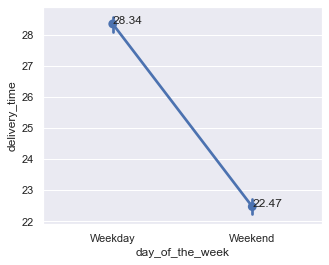

The mean delivery time drops by 5.87 minutes on weekends.


In [17]:
# Visualize mean delivery time on day of the week using point plot

plt.figure(figsize=(5,4))
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="day_of_the_week", y="delivery_time", data=df, order=["Weekday","Weekend"])

for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate(round(of[1],2),of)
        
plt.show()

print("The mean delivery time drops by {} minutes on weekends.".format(round(df["delivery_time"][df["day_of_the_week"]=="Weekday"].mean()-df["delivery_time"][df["day_of_the_week"]=="Weekend"].mean(),2)))


#### Observations:
The mean delivery time drops by <b> 5.87 </b> minutes on weekends.

### Conclusion and Recommendations

# **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions

1. American is the most popular cuisine on weekends and weekdays with Shake Shack being the higest revenue generator.    Shake Shack is also the rsstaurant with highest number of returning / frequent customers.  
2. The delivery time is higher on weekdays compared to weekends. There is a need to collect further data to understand the root cause. There are less number of orders on weekdays, i.e. restaurant rush is not a factor causing the delay.
3. Among the top 10 restaurants by number of orders, Parm restaurant has the lowest average rating on weekend. The same restaurant has average rating higher than 4.5 on Weekdays. This could be an indication of weekend rush (higher number of orders) affecting quality or service. 
4. Japanese and Indian have 3rd rating for their highest cost of orders. This indicates that there is need for improvement in food quality and/or service for customers to get value for their money.
5. The Meatball Shop, Parm, Blue Ribbon Sushi Bar & Grill, RedFarm Hudson are the top four restaurants in terms of average customer rating higher than 4.5 on weekdays. 


### Recommendations
**Customer Retention**
1. Offer a discount on a minimum order value, say 20 dollars, to returning customers of top 10 revenue generating restaurants with average cost of order between 15 to 20 dollars, as a measure towards revenue generation.
2. Offer a fixed value or percentage discount to returning customers of top 10 revenue generating restaurants after n number of orders on their (n+1)th  order. e.g. Give 20% off on a minimum value order to returning customers with average cost greater than 20 dollars after consecutive 5 orders on their 6th order. The higher the number of orders above 20 dollars, the higher is FoodHub's revenue as it charges 25% of the order value. 
3. Show advertisements and notify nearby popular cuisines to one time customers. 
            
**Customer Acquisition**
1. Liaise with restaurants to create and promote meal deals / family sharers available exclusively on FoodHub on weekdays for American, Mediterranean, Thai, Korean, Spanish and Vietnamese cuisines where average cost of order is low on weekdays. 

**Restaurant Promotion**
1. There are 57 restaurants with no orders on weekdays. There isn't enough information to know if these restaurants are open on weekdays, but if they are, run discount promotion over a minimum order value on certain weekdays to attract customers. The 19 restaurants with no orders on weekends could use similar strategy. e.g. 20% discount on minimum order of 20 dollars every Wednesday until a certain date. 
2. Run promotions for restaurants having average rating higher than 4.5 on weekdays to increase number of orders on weekdays. 

**Service Improvement**
1. Deploy more staff to reduce delivery time on weekdays. 
2. Among the top 10 restaurants by number of orders, there is a need for Parm restaurant to improve its food quality or service on weekends since its average rating is less than 4. 